<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Two: Exploratory data analysis and feature extraction. </h2>	


 We expect all external sources sited, and significant indication of EDA. 

In [82]:
#Import anything you need here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import skimage
from PIL import Image

from skimage import data
from skimage import io
import os
from skimage.io import imread_collection
from skimage.io import imread
import zipfile
import matplotlib.image as mpimg
import cv2
import seaborn as sns
from sklearn.cluster import KMeans
from skimage import measure
import numpy as np
import imageio
import warnings
import matplotlib.cbook

<h5> In this section, Compute at least 15 such image features (a method for each), including the following (NOTE: At least 10 of these must be scalar features and 2 matrix-based features): (i) image size, (ii) average of the red-channel intensity, (iii) aspectratio. This will require significant explatoratory research and data analysis. The first one is already implemented for you, and the next two are pre-specified. Additional requirements specfied in pdf. </h5>

In [109]:
def ft0(image):
    # Returns the pixel size of the image
    return image.size
def ft1(image):
    # Returns the average of the red-channel pictures for the images
    img_array = np.asarray(image, dtype = 'int32')
    return np.mean(img_array[:, :, 2])
    raise notImplementedError()
def ft2(image):
    #Returns the aspect ratio of the image
    img_array = np.asarray(image, dtype = 'int32')
    height = img_array.shape[0]
    width = img_array.shape[1]
    return width/height
    raise notImplementedError()
def ft3(image):
    # Returns the average of the blue-channel pictures for the images
    img_array = np.asarray(image, dtype = 'int32')
    return np.mean(img_array[:, :, 0])
    raise notImplementedError()
def ft4(image):
    # Returns the average of the green-channel pictures for the images
    img_array = np.asarray(image, dtype = 'int32')
    return np.mean(img_array[:, :, 1])
    raise notImplementedError()    
def ft5(image):
    """Returns corners from Shi-Tomasi Corner Detector"""
    img = np.float32(image)
    if len(image.shape) == 3:
        gray = cv2.cvtColor(np.float32(img),cv2.COLOR_BGR2GRAY)
    else:
        gray = img
    corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
    corners = np.int0(corners)
#     for i in corners:
#             x,y = i.ravel()
#         cv2.circle(img,(x,y),3,255,-1)
#     plt.imshow(img),plt.show()
    return corners
def ft6(Image):
    """Returns array of contours of Image"""
    img_array = np.asarray(Image, dtype="int32")
    pic = img_array
    
    h,w = pic.shape[:2]
    
    im_small_long = pic.reshape((h * w, 3))
    im_small_wide = im_small_long.reshape((h,w,3))
    
    km = KMeans(n_clusters=2)
    km.fit(im_small_long)
    seg = np.asarray([(1 if i == 1 else 0) 
                      for i in km.labels_]).reshape((h,w))
    contours = measure.find_contours(seg, 0.5, fully_connected="high")
    simplified_contours = [measure.approximate_polygon(c, tolerance=5)
                           for c in contours]
    plt.figure(figsize=(5,10))
    for n, contour in enumerate(simplified_contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
    return contours

def ft7(Image):
    """Returns array of simplified contours of Image"""
    img_array = np.asarray(Image, dtype="int32")
    pic = img_array
    
    h,w = pic.shape[:2]
    
    im_small_long = pic.reshape((h * w, 3))
    im_small_wide = im_small_long.reshape((h,w,3))
    
    km = KMeans(n_clusters=2)
    km.fit(im_small_long)
    seg = np.asarray([(1 if i == 1 else 0) 
                      for i in km.labels_]).reshape((h,w))
    contours = measure.find_contours(seg, 0.5, fully_connected="high")
    simplified_contours = [measure.approximate_polygon(c, tolerance=5)
                           for c in contours]
#     plt.figure(figsize=(5,10))
#     for n, contour in enumerate(simplified_contours):
#         plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
    return simplified_contours

def ft8(image):
    """Returns the number of keypoints using ORB (Oriented FAST and Rotated BRIEF)"""
    img = np.float32(image)
    
    # Initiate STAR detector
    orb = cv2.ORB_create(scoreType=cv2.ORB_FAST_SCORE)
    
    # find the keypoints with ORB
    kp = orb.detect(img)
    
    # compute the descriptors with ORB
    kp, des = orb.compute(img, kp)
    return len(kp)
#     draw only keypoints location,not size and orientation
#     img2 = cv2.drawKeypoints(img,kp,outImage = None,color=(0,255,0), flags=0)
#     plt.imshow(img2),plt.show()

def ft9(image):
    """Returns the total number of pixels"""
    s = ft0(image)
    x,y = s[0], s[1]
    return x*y

def ft10(image):
    """Returns the corners from Harris Corner Detection"""
    img = np.float32(image)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # find Harris corners
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,2,3,0.04)
    dst = cv2.dilate(dst,None)
    ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
    dst = np.uint8(dst)
    
    # find centroids
    ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
    
    # define the criteria to stop and refine the corners
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
    corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
    return corners

def ft11(image):
    """Returns the number of keypoints from FAST Algorithm for Corner Detection"""
    img = np.float32(image)
    
    # Initiate FAST object with default values
    fast = cv2.FastFeatureDetector_create(threshold=25)
    
    # find and draw the keypoints
    kp = fast.detect(img,None)
    return len(kp)

def ft12(Image):
    """Turns Image into grayscale array"""
    img_array = np.asarray(Image, dtype="int32")
    # get average pixel value of image in grayscale, might indicate intensity
    return np.mean(np.asarray(img1.convert('LA'), dtype = 'int32'))

def ft13(Image):
    """get average residual disatance of pixels to mean"""
    curr = (np.asarray(Image.convert('LA'), dtype = 'int32'))
    mean = np.mean(curr)
    residuals = np.abs(curr - mean)
    average_residual = np.mean(residuals)
    return average_residual

def ft14(Image):
    """Replaces pixels with intensities of lower than 180 with white pixel"""
    pic = np.asarray(Image, dtype="int32")
    for i in np.arange(2):
        pic[pic[:, :, i] > 180] = 255 
    return pic

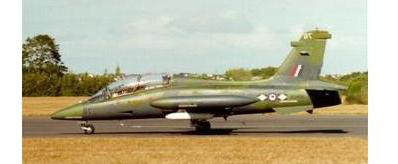

In [103]:
img1 = Image.fromarray(starting_data.iloc[0][0])
img1


In [84]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,2], rgb[:,:,1], rgb[:,:,0]
    gray = 0.07 * b + 0.72 * g + 0.21 * r
    return gray

def rgb22gray(rgb):
    r, g, b = rgb[:,:,2], rgb[:,:,1], rgb[:,:,0]
    gray = 0.2989 * b + 0.5870 * g + 0.1140 * r
    return gray

In [85]:
# Maximum-likelihood, Minimum-distance-to-mean, and Minimum-Mahalanobis-distance are three of these

In [86]:
#(np.asarray(img1.convert('LA'), dtype = 'int32'))

In [114]:
curr = (np.asarray(img1.convert('LA'), dtype = 'int32'))
mean = np.mean(curr)
mean
#residuals = np.abs(curr - mean)
#average_residual = np.mean(residuals)

215.05557513175634

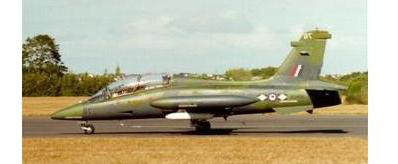

In [87]:
img1 = Image.fromarray(starting_data.iloc[0][0])
img1

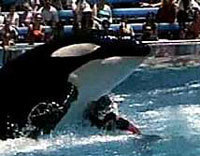

In [104]:
img2 = Image.fromarray(starting_data.iloc[850][0])
img2

In [120]:
ft14(img1)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [89]:
gray = cv2.cvtColor(np.float32(img1),cv2.COLOR_BGR2GRAY)
gray

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)

In [97]:
starting_data = pd.read_pickle("start_data.pk1")
starting_data.shape

(1501, 2)

In [91]:
validation_data = pd.read_pickle('validation_data.pk1')

<h4> Graphs </h4>

In [92]:
x = starting_data.groupby('Encoding').count()['Pictures']

In [93]:
sns.barplot(x="Pictures", y="Encoding", data=tips)

NameError: name 'tips' is not defined

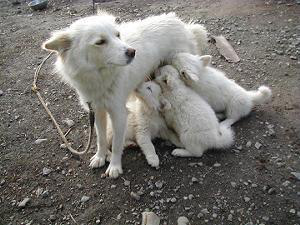

In [105]:
img3 = Image.fromarray(starting_data.iloc[370][0])
img3

In [123]:
img4 = ft12(img3)
img5 = Image.fromarray(img4)
plt.imshow(img3)
plt.show()

IndexError: tuple index out of range

In [ ]:
# Pixel intensities for Image 1
img1 = np.float32(img1)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img1],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title("BGR plot for Image 1")
plt.show()


In [ ]:
# Pixel intensities for Image 2
img2 = np.float32(img2)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img2],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title("BGR plot for Image 2")
plt.show()



In [101]:
x_val = [x[0] for x in starting_data['Size']]
y_val = [x[1] for x in starting_data['Size']]
starting_data_sizes["x"] = x_val
starting_data_sizes["y"] = y_val
sns.scatterplot(x="x", y="y", hue="Encoding", legend="full", data= starting_data)
plt.title('Size of Images')
plt.xlabel('Size of X axis')
plt.ylabel('Size of Y axis')
# plt.figure(figsize=(20,40))

KeyError: 'Size'

In [107]:

starting_data["Avg Pixel Intensity"] = starting_data['Images'].map(lambda x: ft12(x))
sns.barplot(x="Encoding", y="Avg Pixel Intensity", data=starting_data)
plt.title("Average Pixel Intensity by Encoding")

KeyError: 'Images'

In [81]:
"""author: Mohammed Innat
email:  innat1994@gmail.com
website: https://iphton.github.io/iphton.github.io/
Please feel free to use and modify this, but keep the above information. Thanks!"""

'author: Mohammed Innat\nemail:  innat1994@gmail.com\nwebsite: https://iphton.github.io/iphton.github.io/\nPlease feel free to use and modify this, but keep the above information. Thanks!'

<h4> DataFrame Creation </h4>

In [ ]:
def feature_frame(df):
    return df
    #Returns data-frame with all the features now inside, and calculated


In [ ]:
feature_frame(data_from_nb1)